<a href="https://colab.research.google.com/github/omarrshaheenn/Omar-Shaheen/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [27]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV














# **Reading the data**

In [28]:
df = pd.read_csv('/content/Dataset.csv')
df = df.fillna(df.ffill()) 
df = df.drop(labels=['link'], axis=1)
exclude_features = ['digit_count', 'url_length','domain-age']
for col in df.columns:
    if col not in exclude_features:
        df[col] = df[col].astype(bool)
    else:
        df[col] = df[col].astype(int)
df.head()

,has_https,url_length,has_brand,digit_count,has_ip_address,has_port_number,has_domain,has_unicode,has_subdomain,@,...,!,*,",",auto-download,domain-age,internal-form,external-favicon,media-link,pop-up,label
0,True,71,True,8,False,False,True,False,True,False,...,False,False,False,False,7060,True,False,False,False,False
1,True,64,False,0,False,False,True,False,True,False,...,False,False,False,False,1982,False,False,True,True,False
2,True,129,True,6,False,False,True,False,True,False,...,False,False,True,False,8413,False,False,False,True,False
3,True,62,True,3,False,False,True,False,True,False,...,False,False,False,False,11681,False,False,False,False,False
4,True,27,True,1,False,False,True,False,True,False,...,False,False,False,False,0,False,False,True,True,False


# **Checking the data**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   has_https         9087 non-null   bool 
 1   url_length        9087 non-null   int64
 2   has_brand         9087 non-null   bool 
 3   digit_count       9087 non-null   int64
 4   has_ip_address    9087 non-null   bool 
 5   has_port_number   9087 non-null   bool 
 6   has_domain        9087 non-null   bool 
 7   has_unicode       9087 non-null   bool 
 8   has_subdomain     9087 non-null   bool 
 9   @                 9087 non-null   bool 
 10  ?                 9087 non-null   bool 
 11  //                9087 non-null   bool 
 12  =                 9087 non-null   bool 
 13  -                 9087 non-null   bool 
 14  .                 9087 non-null   bool 
 15  ...               9087 non-null   bool 
 16  !                 9087 non-null   bool 
 17  *                 9087 non-null  

In [30]:
df.describe()

,url_length,digit_count,domain-age
count,9087.000000,9087.000000,9087.000000
mean,61.453285,5.314075,4376.416199
std,53.887722,15.945875,3521.070146
min,1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000
50%,48.000000,0.000000,4500.000000
75%,71.000000,4.000000,7440.500000
max,1642.000000,679.000000,13567.000000


In [31]:
Legit = df[df['label']==0]
Fraud = df[df['label']==1]
print(Fraud.shape, Legit.shape)

(4526, 26) (4561, 26)


# **Plotting the data**

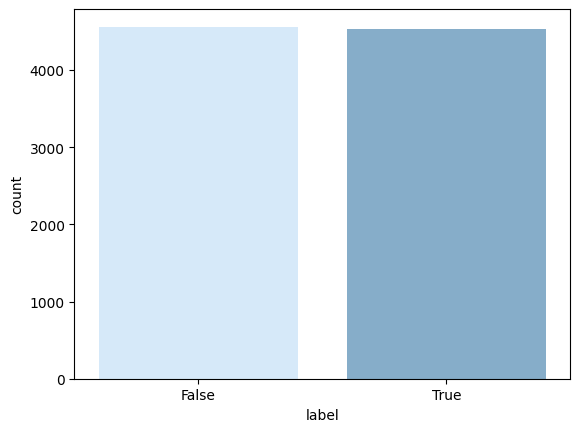

In [32]:
sns.countplot(data=df, x='label', palette=['#D0E9FF', '#7BAFD4'])
plt.show()

# **Correlation**


<Axes: >

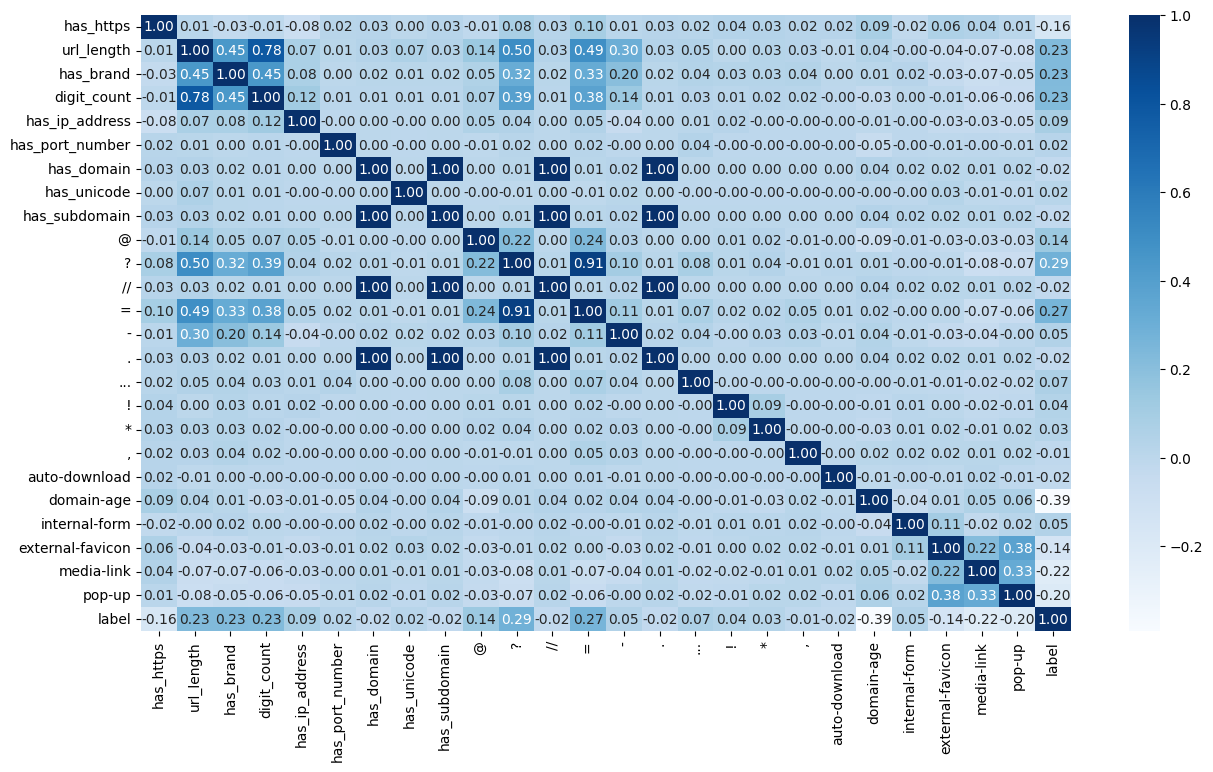

In [33]:
corr = df.corr()
fig = plt.figure(figsize = (15, 8))
cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")


# **Removing duplicate transactions**

In [34]:
df.shape

(9087, 26)

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.shape

(7672, 26)

In [37]:
df['label'].value_counts()

True     4009
False    3663
Name: label, dtype: int64

# **Preprocessing the dataset**

# **Encoding the categorical feature**

In [38]:
label = LabelEncoder()
df['label'] = label.fit_transform(df['label'])

In [39]:
X = df.drop(['label'], axis=1)
y = df['label']


# **Train and test split**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# **Logistic Regression on balanced data**



In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(accuracy*100))

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Test set accuracy: 76.93%
Precision: 80.27%
Recall: 73.92%


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1102
           1       0.80      0.74      0.77      1200

    accuracy                           0.77      2302
   macro avg       0.77      0.77      0.77      2302
weighted avg       0.77      0.77      0.77      2302



# **Confusion Matrix**

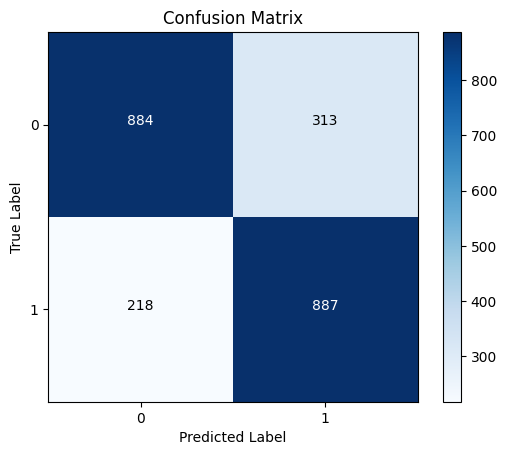

In [43]:
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_pred, y_test)
# Create plot
plt.imshow(matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell
thresh = matrix.max() / 2
for i, j in np.ndindex(matrix.shape):
    plt.text(j, i, matrix[i, j],
             horizontalalignment='center',
             color='white' if matrix[i, j] > thresh else 'black')

# Display plot
plt.show()

# **k-Nearest Neighbors on balanced data**

In [44]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(accuracy*100))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Test set accuracy: 76.50%
Precision: 78.93%
Recall: 74.92%


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1102
           1       0.79      0.75      0.77      1200

    accuracy                           0.76      2302
   macro avg       0.77      0.77      0.76      2302
weighted avg       0.77      0.76      0.77      2302



# **Confusion Matrix**

# **Support Vector Classifier on balanced data**

In [46]:
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(accuracy*100))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Test set accuracy: 77.45%
Precision: 80.32%
Recall: 75.17%


In [ ]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

In [ ]:
print(classification_report(y_test, y_pred))

# **Confusion Matrix**

# **Decision Tree on balanced data**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(accuracy*100))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

In [ ]:
print(classification_report(y_test, y_pred))

# **Confusion Matrix**

# **Random Forest Classifier on balanced data**




In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(accuracy*100))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

In [ ]:
print(classification_report(y_test, y_pred))